In [95]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Objective: Build machine learning models to predict way to improve website design to increase revenue

In [96]:
data_visual = pd.read_csv("e-shop clothing 2008.csv",delimiter=";")
data = pd.read_csv("e-shop clothing 2008.csv",delimiter=";")

In [97]:
# Transform data in data_visual to categorical variable for easier visualisation
data_visual["month"] = data_visual["month"].replace(to_replace = [4,5,6,7,8],value = ["April","May","June","Jule","August"])
data_visual["page 1 (main category)"] = data_visual["page 1 (main category)"].replace(to_replace = [1,2,3,4], 
                                value  =["Trousers","Skirts","Blouses","Sale"])
data_visual["colour"] = data_visual["colour"].replace(to_replace = [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                                       value = ["beige","black","blue","brown","burgundy","gray","green","navy blue",
                                                "of many colors","olive","pink","red","violet","white"])

In [98]:
data.describe()

year          month            day          order        country  \
count  165474.0  165474.000000  165474.000000  165474.000000  165474.000000   
mean     2008.0       5.585887      14.524554       9.817476      26.952621   
std         0.0       1.328160       8.830374      13.478411       7.150691   
min      2008.0       4.000000       1.000000       1.000000       1.000000   
25%      2008.0       4.000000       7.000000       2.000000      29.000000   
50%      2008.0       5.000000      14.000000       6.000000      29.000000   
75%      2008.0       7.000000      22.000000      12.000000      29.000000   
max      2008.0       8.000000      31.000000     195.000000      47.000000   

          session ID  page 1 (main category)         colour       location  \
count  165474.000000           165474.000000  165474.000000  165474.000000   
mean    12058.417056                2.400842       6.227655       3.258198   
std      7008.418903                1.144420       4.235606       1.713206   
min         1.000000                1.000000       1.000000       1.000000   
25%      5931.000000                1.000000       3.000000       2.000000   
50%     11967.500000                2.000000       4.000000       3.000000   
75%     18219.000000                3.000000       9.000000       5.000000   
max     24026.000000                4.000000      14.000000       6.000000   

       model photography          price        price 2           page  
count      165474.000000  165474.000000  165474.000000  165474.000000  
mean            1.260071      43.802507       1.488167       1.710166  
std             0.438674      12.548131       0.499861       0.982412  
min             1.000000      18.000000       1.000000       1.000000  
25%             1.000000      33.000000       1.000000       1.000000  
50%             1.000000      43.000000       1.000000       1.000000  
75%             2.000000      52.000000       2.000000       2.000000  
max             2.000000      82.000000       2.000000       5.000000

In [99]:
data_visual.describe()

year            day          order        country     session ID  \
count  165474.0  165474.000000  165474.000000  165474.000000  165474.000000   
mean     2008.0      14.524554       9.817476      26.952621   12058.417056   
std         0.0       8.830374      13.478411       7.150691    7008.418903   
min      2008.0       1.000000       1.000000       1.000000       1.000000   
25%      2008.0       7.000000       2.000000      29.000000    5931.000000   
50%      2008.0      14.000000       6.000000      29.000000   11967.500000   
75%      2008.0      22.000000      12.000000      29.000000   18219.000000   
max      2008.0      31.000000     195.000000      47.000000   24026.000000   

            location  model photography          price        price 2  \
count  165474.000000      165474.000000  165474.000000  165474.000000   
mean        3.258198           1.260071      43.802507       1.488167   
std         1.713206           0.438674      12.548131       0.499861   
min         1.000000           1.000000      18.000000       1.000000   
25%         2.000000           1.000000      33.000000       1.000000   
50%         3.000000           1.000000      43.000000       1.000000   
75%         5.000000           2.000000      52.000000       2.000000   
max         6.000000           2.000000      82.000000       2.000000   

                page  
count  165474.000000  
mean        1.710166  
std         0.982412  
min         1.000000  
25%         1.000000  
50%         1.000000  
75%         2.000000  
max         5.000000

# -------------------------------------------------------------------------------------------------------------

## Visualization

In [100]:
# Get the count of purchases each day
day_counter = Counter()
day_counter.update(data_visual['day'])
days = []
counts = []
for item in sorted(day_counter.items()):
    days.append(item[0])
    counts.append(item[1])

In [101]:
month_counter = Counter()
month_counter.update(data_visual['month'])
months = []
month_counts = []
print(month_counter)
for item in sorted(month_counter.items()):
    months.append(item[0])
    month_counts.append(item[1])
print(month_counts)

Counter({'April': 48199, 'May': 35654, 'Jule': 35231, 'June': 32242, 'August': 14148})
[48199, 14148, 35231, 32242, 35654]


We can see customers usually make their purchases in the beginning of the month, and most purchase were made in April


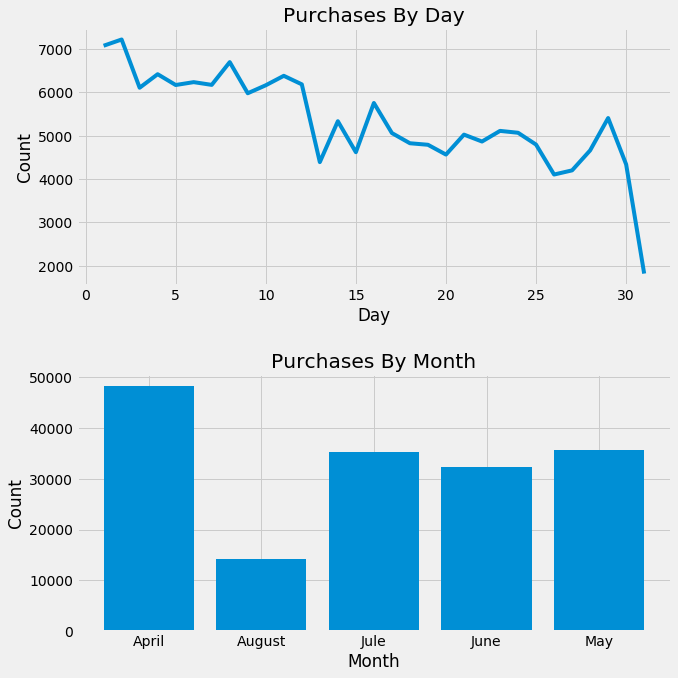

In [102]:
#print(plt.style.available)
plt.style.use("fivethirtyeight")
fig, (ax1,ax2) = plt.subplots(nrows = 2,ncols = 1,figsize=(10,10))
ax1.plot(days,counts)
ax1.set_title("Purchases By Day")
ax1.set_ylabel("Count")
ax1.set_xlabel("Day")
ax2.bar(months,month_counts)
ax2.set_title("Purchases By Month")
ax2.set_ylabel("Count")
ax2.set_xlabel("Month")
plt.tight_layout(pad = 2.0)
plt.show
print("We can see customers usually make their purchases in the beginning of the month, and most purchase were made in April")

In [103]:
#Get the idea of where is the customers coming from
country_counter = Counter()
country_counter.update(data_visual['country'])
print(country_counter)

Counter({29: 133963, 9: 18003, 24: 4091, 46: 2522, 44: 1385, 16: 834, 21: 811, 34: 716, 41: 684, 3: 256, 27: 227, 12: 210, 42: 170, 37: 163, 10: 152, 31: 144, 22: 144, 28: 139, 38: 137, 15: 125, 11: 115, 25: 71, 2: 58, 32: 49, 23: 46, 14: 43, 39: 34, 43: 31, 19: 29, 17: 23, 36: 19, 18: 18, 20: 10, 7: 9, 47: 7, 45: 6, 30: 5, 6: 5, 5: 4, 33: 3, 1: 3, 35: 3, 13: 2, 26: 2, 8: 1, 40: 1, 4: 1})


Text(0.5, 1.0, 'Top 5 Country with Highest Purchaese')

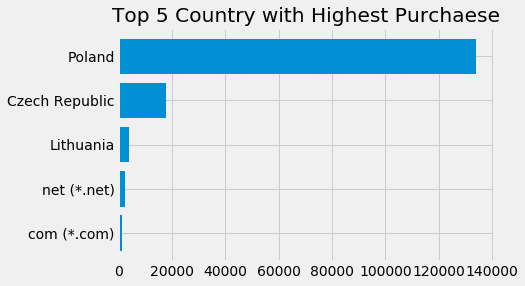

In [104]:
countries = []
count = []
for item in country_counter.most_common(5):
    countries.append(item[0])
    count.append(item[1])
countries =  ["Poland","Czech Republic","Lithuania","net (*.net)","com (*.com)"]
countries.reverse()
count.reverse()
plt.barh(countries,count)
plt.title("Top 5 Country with Highest Purchaese")

In [105]:
main_cat = Counter()
main_cat.update(data_visual["page 1 (main category)"])
main_cat_name = []
main_cat_count = []
for item in main_cat.items():
    main_cat_name.append(item[0])
    main_cat_count.append(item[1])
color_counter = Counter()
color_counter.update(data_visual["colour"])
color = []
counts = []
for item in color_counter.items():
    color.append(item[0])
    counts.append(item[1])

Text(0.5, 0, 'Quantity')

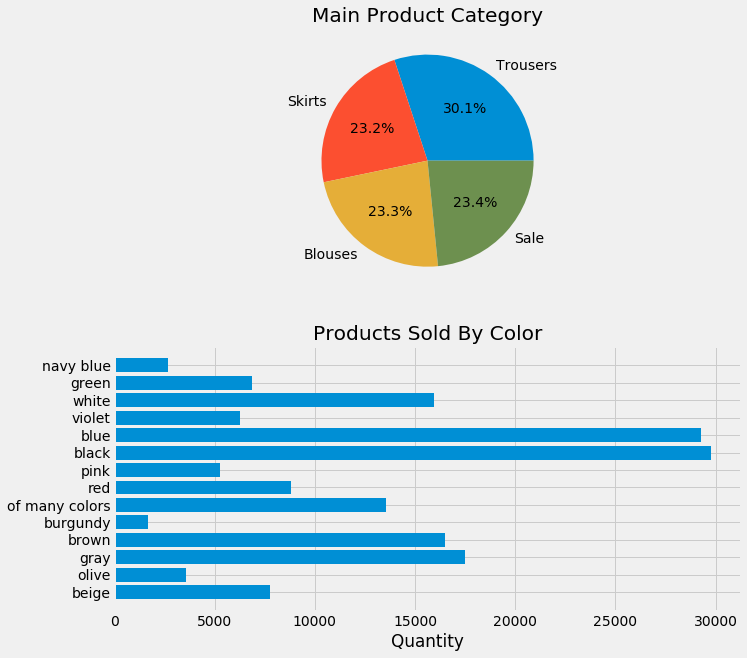

In [106]:
fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1,figsize = (10,10))
ax1.pie(main_cat_count,labels = main_cat_name,autopct='%1.1f%%')
ax1.set_title("Main Product Category")
#ax.legend(main_cat_name)
ax2.barh(color,counts)
ax2.set_title("Products Sold By Color")
ax2.set_xlabel("Quantity")

In [107]:
data.corr()

year     month       day     order   country  \
year                     NaN       NaN       NaN       NaN       NaN   
month                    NaN  1.000000 -0.075098  0.026093  0.065502   
day                      NaN -0.075098  1.000000 -0.021744  0.011551   
order                    NaN  0.026093 -0.021744  1.000000 -0.064709   
country                  NaN  0.065502  0.011551 -0.064709  1.000000   
session ID               NaN  0.970961  0.161369  0.021829  0.065869   
page 1 (main category)   NaN  0.017557 -0.001251  0.151693  0.132817   
colour                   NaN -0.035279  0.005313  0.046427  0.009789   
location                 NaN -0.017712  0.000596  0.014854 -0.009072   
model photography        NaN  0.011102 -0.000211  0.061820  0.028725   
price                    NaN  0.012700 -0.002818 -0.064779 -0.045345   
price 2                  NaN -0.014658  0.004254  0.000772 -0.017536   
page                     NaN  0.020898  0.011125  0.204106  0.026695   

                        session ID  page 1 (main category)    colour  \
year                           NaN                     NaN       NaN   
month                     0.970961                0.017557 -0.035279   
day                       0.161369               -0.001251  0.005313   
order                     0.021829                0.151693  0.046427   
country                   0.065869                0.132817  0.009789   
session ID                1.000000                0.016123 -0.032034   
page 1 (main category)    0.016123                1.000000  0.230577   
colour                   -0.032034                0.230577  1.000000   
location                 -0.016721                0.015939  0.042062   
model photography         0.010585                0.213113  0.074755   
price                     0.011669               -0.364791 -0.091159   
price 2                  -0.012742               -0.137944 -0.080147   
page                      0.023254                0.347992  0.249322   

                        location  model photography     price   price 2  \
year                         NaN                NaN       NaN       NaN   
month                  -0.017712           0.011102  0.012700 -0.014658   
day                     0.000596          -0.000211 -0.002818  0.004254   
order                   0.014854           0.061820 -0.064779  0.000772   
country                -0.009072           0.028725 -0.045345 -0.017536   
session ID             -0.016721           0.010585  0.011669 -0.012742   
page 1 (main category)  0.015939           0.213113 -0.364791 -0.137944   
colour                  0.042062           0.074755 -0.091159 -0.080147   
location                1.000000           0.067678 -0.084653  0.073187   
model photography       0.067678           1.000000 -0.212395  0.072944   
price                  -0.084653          -0.212395  1.000000 -0.743633   
price 2                 0.073187           0.072944 -0.743633  1.000000   
page                   -0.091865           0.258315 -0.150455  0.029984   

                            page  
year                         NaN  
month                   0.020898  
day                     0.011125  
order                   0.204106  
country                 0.026695  
session ID              0.023254  
page 1 (main category)  0.347992  
colour                  0.249322  
location               -0.091865  
model photography       0.258315  
price                  -0.150455  
price 2                 0.029984  
page                    1.000000

# -------------------------------------------------------------------------------------------------------------

## Machine Learning

## Predict way to improve website design to increase revenue

In [108]:
# In order to predict way to improve website design to increase revenue, 
# I would use Price 2 (the product price is above average or not) to be the target variable
# and explore what are the factors that make a customer buy a product that has a price above average
# which is more likely to have higher profit and help increase reveneue

In [109]:
data['price 2'] = data['price 2'].replace(to_replace = 2,value = 0)

In [110]:
data.describe()

year          month            day          order        country  \
count  165474.0  165474.000000  165474.000000  165474.000000  165474.000000   
mean     2008.0       5.585887      14.524554       9.817476      26.952621   
std         0.0       1.328160       8.830374      13.478411       7.150691   
min      2008.0       4.000000       1.000000       1.000000       1.000000   
25%      2008.0       4.000000       7.000000       2.000000      29.000000   
50%      2008.0       5.000000      14.000000       6.000000      29.000000   
75%      2008.0       7.000000      22.000000      12.000000      29.000000   
max      2008.0       8.000000      31.000000     195.000000      47.000000   

          session ID  page 1 (main category)         colour       location  \
count  165474.000000           165474.000000  165474.000000  165474.000000   
mean    12058.417056                2.400842       6.227655       3.258198   
std      7008.418903                1.144420       4.235606       1.713206   
min         1.000000                1.000000       1.000000       1.000000   
25%      5931.000000                1.000000       3.000000       2.000000   
50%     11967.500000                2.000000       4.000000       3.000000   
75%     18219.000000                3.000000       9.000000       5.000000   
max     24026.000000                4.000000      14.000000       6.000000   

       model photography          price        price 2           page  
count      165474.000000  165474.000000  165474.000000  165474.000000  
mean            1.260071      43.802507       0.511833       1.710166  
std             0.438674      12.548131       0.499861       0.982412  
min             1.000000      18.000000       0.000000       1.000000  
25%             1.000000      33.000000       0.000000       1.000000  
50%             1.000000      43.000000       1.000000       1.000000  
75%             2.000000      52.000000       1.000000       2.000000  
max             2.000000      82.000000       1.000000       5.000000

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
year                       165474 non-null int64
month                      165474 non-null int64
day                        165474 non-null int64
order                      165474 non-null int64
country                    165474 non-null int64
session ID                 165474 non-null int64
page 1 (main category)     165474 non-null int64
page 2 (clothing model)    165474 non-null object
colour                     165474 non-null int64
location                   165474 non-null int64
model photography          165474 non-null int64
price                      165474 non-null int64
price 2                    165474 non-null int64
page                       165474 non-null int64
dtypes: int64(13), object(1)
memory usage: 17.7+ MB


In [112]:
data["country"] = data["country"].astype('category')
data["page 1 (main category)"] = data["page 1 (main category)"].astype('category')
data["colour"] = data["colour"].astype('category')
data["location"] = data["location"].astype('category')
data["model photography"] = data["model photography"].astype('category')

In [113]:
# We are not seeing any null value so we can save ourselves from filling null by guessing
# Which would affect the accuracy of the model
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
year                       165474 non-null int64
month                      165474 non-null int64
day                        165474 non-null int64
order                      165474 non-null int64
country                    165474 non-null category
session ID                 165474 non-null int64
page 1 (main category)     165474 non-null category
page 2 (clothing model)    165474 non-null object
colour                     165474 non-null category
location                   165474 non-null category
model photography          165474 non-null category
price                      165474 non-null int64
price 2                    165474 non-null int64
page                       165474 non-null int64
dtypes: category(5), int64(8), object(1)
memory usage: 12.2+ MB


In [114]:
# one-hot encoding
country_dummy = pd.get_dummies(data['country'],prefix = 'country')
main_category_dummy = pd.get_dummies(data['page 1 (main category)'],prefix = 'main_category')
colour_dummy = pd.get_dummies(data['colour'],prefix = 'colour')
location_dummy = pd.get_dummies(data['location'],prefix = 'location')
model_photography_dummy = pd.get_dummies(data['model photography'],prefix = 'model_photography')
page_dummy = pd.get_dummies(data['page'],prefix = 'page')

In [115]:
data_dummy = pd.concat([data,country_dummy,main_category_dummy,
                        colour_dummy,location_dummy,model_photography_dummy,page_dummy],axis = 1,sort = True)

In [116]:
data_dummy

year  month  day  order country  session ID page 1 (main category)  \
0       2008      4    1      1      29           1                      1   
1       2008      4    1      2      29           1                      1   
2       2008      4    1      3      29           1                      2   
3       2008      4    1      4      29           1                      2   
4       2008      4    1      5      29           1                      2   
...      ...    ...  ...    ...     ...         ...                    ...   
165469  2008      8   13      1      29       24024                      2   
165470  2008      8   13      1       9       24025                      1   
165471  2008      8   13      1      34       24026                      1   
165472  2008      8   13      2      34       24026                      3   
165473  2008      8   13      3      34       24026                      2   

       page 2 (clothing model) colour location  ... location_4  location_5  \
0                          A13      1        5  ...          0           1   
1                          A16      1        6  ...          0           0   
2                           B4     10        2  ...          0           0   
3                          B17      6        6  ...          0           0   
4                           B8      4        3  ...          0           0   
...                        ...    ...      ...  ...        ...         ...   
165469                     B10      2        4  ...          1           0   
165470                     A11      3        4  ...          1           0   
165471                      A2      3        1  ...          0           0   
165472                      C2     12        1  ...          0           0   
165473                      B2      3        1  ...          0           0   

        location_6  model_photography_1  model_photography_2  page_1  page_2  \
0                0                    1                    0       1       0   
1                1                    1                    0       1       0   
2                0                    1                    0       1       0   
3                1                    0                    1       1       0   
4                0                    0                    1       1       0   
...            ...                  ...                  ...     ...     ...   
165469           0                    1                    0       1       0   
165470           0                    1                    0       1       0   
165471           0                    1                    0       1       0   
165472           0                    1                    0       1       0   
165473           0                    0                    1       1       0   

        page_3  page_4  page_5  
0            0       0       0  
1            0       0       0  
2            0       0       0  
3            0       0       0  
4            0       0       0  
...        ...     ...     ...  
165469       0       0       0  
165470       0       0       0  
165471       0       0       0  
165472       0       0       0  
165473       0       0       0  

[165474 rows x 92 columns]

In [117]:
#drop columns that have done one-hot encoding
to_drop = ['order','page 1 (main category)','page','model photography','country','colour','location']
data_dummy.drop(to_drop,axis=1,inplace = True)

# -------------------------------------------------------------------------------------------------------------

# Decision Tree

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [119]:
# As I am trying to predict the price 2 which mean the product's price is above average
# I believe excluding price from features would produce a more meaningful result
features = [c for c in data_dummy.columns]
target = ['price 2']

In [120]:
remove_list = ['year','month','day','session ID','page 2 (clothing model)','price','price 2']
for c in remove_list:
    features.remove(c)

In [27]:
X = data_dummy [features]
y = data_dummy [target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
pred_test = model.predict(X_test)

In [30]:
# evaluate result 
print("Accuracy:",accuracy_score(y_test, pred_test, normalize=True, sample_weight=None))
print("Classification Report:", '\n',classification_report(y_test, pred_test))
print("Confusion Matrix:", "\n", confusion_matrix(y_test, pred_test))

Accuracy: 0.9287354585284786
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.93      0.93     32278
           1       0.93      0.93      0.93     33912

    accuracy                           0.93     66190
   macro avg       0.93      0.93      0.93     66190
weighted avg       0.93      0.93      0.93     66190

Confusion Matrix: 
 [[30045  2233]
 [ 2484 31428]]


In [31]:
treeObj = model.tree_
from sklearn import tree
import matplotlib.pyplot as plt

In [32]:
plt.figure(figsize = (100,150))
tree.plot_tree(model,ax=None, fontsize=50)
plt.show()

In [34]:
print("Root Node: " + features[47])
print(
"""
At this stage, the root node of the tree we built is main_category_1, which is trousers, and we can 
explaine the result as main category is the most important factor to determine the product has a above 
average price or not. The implication of the result can be to increase revenue, we can put products belong
to trouses product type on area that customers must have to visit, like home page

From the tree structure, it is very likely that this tree grown too deep and might cause overfitting issue
so I will tackle this in the following""")

Root Node: main_category_1

At this stage, the root node of the tree we built is main_category_1, which is trousers, and we can 
explaine the result as main category is the most important factor to determine the product has a above 
average price or not. The implication of the result can be to increase revenue, we can put products belong
to trouses product type on area that customers must have to visit, like home page

From the tree structure, it is very likely that this tree grown too deep and might cause overfitting issue
so I will tackle this in the following


In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
depths = np.arange(1, 21)
num_leafs = [5, 10, 20, 50, 100]

In [37]:
try_grid = [{'max_depth':depths,
              'max_leaf_nodes':num_leafs}]
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=10)
DTM.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),


In [38]:
print(DTM.best_params_)
print(DTM.best_score_)

{'max_depth': 20, 'max_leaf_nodes': 100}
0.9268042109334397


In [83]:
fine_tuned_DT = DecisionTreeClassifier(max_leaf_nodes = 100,max_depth = 20)
fine_tuned_DT.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
                       max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [84]:
plt.figure(figsize = (100,150))
tree.plot_tree(fine_tuned_DT,ax=None, fontsize=50)
plt.show()

### After using the grid search CV, the performance is even worse, but I belive the reason is the parameter I set is too small, however, due to hardware constraint, I am not going to change it.

# -------------------------------------------------------------------------------------------------------------

### Base on this dataset, it is not really suitable to do supervised learning as there is no clear target we can do prediction on, thus, I would add a column "Purchased" with 1 as yes and 0 as no, with this extra column, we can predict what is the main driver that affect whether a customer would actually purcahse products from us or not.

In [39]:
data = pd.read_csv("e-shop clothing 2008.csv",delimiter=";")

In [40]:
# Randomly generate 1 or 0 for column Purchased so the model we build might not apply to real world 
# But the main purpose is to demonstrate what can we do using supervised learning model in a right way
data['Purchased'] = np.random.randint(0, 2, data.shape[0])

In [41]:
data['Purchased'].describe()

count    165474.000000
mean          0.501402
std           0.500000
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Purchased, dtype: float64

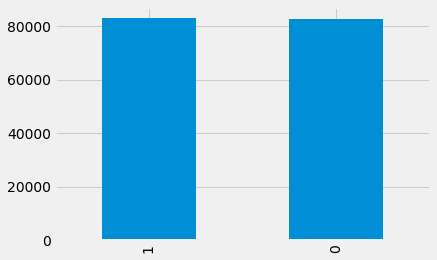

In [42]:
data['Purchased'].value_counts().plot(kind='bar')

In [43]:
# change data type
data["Purchased"] = data["Purchased"].astype('category')

In [44]:
# combine year, month, and day into one column
data['Date'] = pd.to_datetime(data[['year', 'month', 'day']])
to_drop_list = []
to_drop_list.append('year')
to_drop_list.append('month')
to_drop_list.append('day')

In [45]:
data

year  month  day  order  country  session ID  page 1 (main category)  \
0       2008      4    1      1       29           1                       1   
1       2008      4    1      2       29           1                       1   
2       2008      4    1      3       29           1                       2   
3       2008      4    1      4       29           1                       2   
4       2008      4    1      5       29           1                       2   
...      ...    ...  ...    ...      ...         ...                     ...   
165469  2008      8   13      1       29       24024                       2   
165470  2008      8   13      1        9       24025                       1   
165471  2008      8   13      1       34       24026                       1   
165472  2008      8   13      2       34       24026                       3   
165473  2008      8   13      3       34       24026                       2   

       page 2 (clothing model)  colour  location  model photography  price  \
0                          A13       1         5                  1     28   
1                          A16       1         6                  1     33   
2                           B4      10         2                  1     52   
3                          B17       6         6                  2     38   
4                           B8       4         3                  2     52   
...                        ...     ...       ...                ...    ...   
165469                     B10       2         4                  1     67   
165470                     A11       3         4                  1     62   
165471                      A2       3         1                  1     43   
165472                      C2      12         1                  1     43   
165473                      B2       3         1                  2     57   

        price 2  page Purchased       Date  
0             2     1         1 2008-04-01  
1             2     1         1 2008-04-01  
2             1     1         1 2008-04-01  
3             2     1         1 2008-04-01  
4             1     1         1 2008-04-01  
...         ...   ...       ...        ...  
165469        1     1         1 2008-08-13  
165470        1     1         1 2008-08-13  
165471        2     1         1 2008-08-13  
165472        1     1         0 2008-08-13  
165473        1     1         1 2008-08-13  

[165474 rows x 16 columns]

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 16 columns):
year                       165474 non-null int64
month                      165474 non-null int64
day                        165474 non-null int64
order                      165474 non-null int64
country                    165474 non-null int64
session ID                 165474 non-null int64
page 1 (main category)     165474 non-null int64
page 2 (clothing model)    165474 non-null object
colour                     165474 non-null int64
location                   165474 non-null int64
model photography          165474 non-null int64
price                      165474 non-null int64
price 2                    165474 non-null int64
page                       165474 non-null int64
Purchased                  165474 non-null category
Date                       165474 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(13), object(1)
memory usage: 19.1+ MB


In [47]:
data["country"] = data["country"].astype('category')
data["session ID"] = data["session ID"].astype('category')
data["page 1 (main category)"] = data["page 1 (main category)"].astype('category')
data["page 2 (clothing model)"] = data["page 2 (clothing model)"].astype('category')
data["colour"] = data["colour"].astype('category')
data["location"] = data["location"].astype('category')
data["model photography"] = data["model photography"].astype('category')
data["page"] = data["page"].astype('category')
data["price 2"] = data["price 2"].astype('category')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 16 columns):
year                       165474 non-null int64
month                      165474 non-null int64
day                        165474 non-null int64
order                      165474 non-null int64
country                    165474 non-null category
session ID                 165474 non-null category
page 1 (main category)     165474 non-null category
page 2 (clothing model)    165474 non-null category
colour                     165474 non-null category
location                   165474 non-null category
model photography          165474 non-null category
price                      165474 non-null int64
price 2                    165474 non-null category
page                       165474 non-null category
Purchased                  165474 non-null category
Date                       165474 non-null datetime64[ns]
dtypes: category(10), datetime64[ns](1), int64(5)
memory usage: 10

In [49]:
# transform features to a scale from 0 to 1 to avoid make the distance between example overestimated 
# O_minmax_scaler = preprocessing.MinMaxScaler().fit(data[['order']])
# data['order_MM']=C_minmax_scaler.transform(data[['order']])
# P_minmax_scaler = preprocessing.MinMaxScaler().fit(data[['price']])
# data['price_MM']=Co_minmax_scaler.transform(data[['price']])
# to_drop_list.append('order')
# to_drop_list.append('price')

In [50]:
to_drop_list

['year', 'month', 'day']

In [51]:
data.drop(to_drop_list,axis=1,inplace = True)

In [52]:
data.head()

order country session ID page 1 (main category) page 2 (clothing model)  \
0      1      29          1                      1                     A13   
1      2      29          1                      1                     A16   
2      3      29          1                      2                      B4   
3      4      29          1                      2                     B17   
4      5      29          1                      2                      B8   

  colour location model photography  price price 2 page Purchased       Date  
0      1        5                 1     28       2    1         1 2008-04-01  
1      1        6                 1     33       2    1         1 2008-04-01  
2     10        2                 1     52       1    1         1 2008-04-01  
3      6        6                 2     38       2    1         1 2008-04-01  
4      4        3                 2     52       1    1         1 2008-04-01

In [53]:
# As string is not accepted in decision tree model
# I need to perform one-hot encoding on feature page 2 (clothing model)
# country_dummy = pd.get_dummies(data['country'],prefix = 'country')
# main_category_dummy = pd.get_dummies(data['page 1 (main category)'],prefix = 'main_category')
# colour_dummy = pd.get_dummies(data['colour'],prefix = 'colour')
# location_dummy = pd.get_dummies(data['location'],prefix = 'location')
# model_photography_dummy = pd.get_dummies(data['model photography'],prefix = 'model_photography')
# page_dummy = pd.get_dummies(data['page'],prefix = 'page')
page2_dummy = pd.get_dummies(data['page 2 (clothing model)'],prefix = 'clothing model')
data_dummy = pd.concat([page2_dummy],axis = 1,sort = True)

In [54]:
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165474 entries, 0 to 165473
Columns: 217 entries, clothing model_A1 to clothing model_P9
dtypes: uint8(217)
memory usage: 35.5 MB


In [55]:
# Using Purchased as target this time
features = [c for c in data.columns if c not in ['page 2 (clothing model)', 'Date','Purchased']]
target = ['Purchased']

In [56]:
# train-test split, 60% for training, 40% for testing
X = data [features]
y = data [target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 1212)

In [57]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
pred_test = model.predict(X_test)

In [59]:
# evaluate result 
print("Accuracy:",accuracy_score(y_test, pred_test, normalize=True, sample_weight=None))
print("Classification Report:", '\n',classification_report(y_test, pred_test))
print("Confusion Matrix:", "\n", confusion_matrix(y_test, pred_test))

Accuracy: 0.5016165583925064
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     33029
           1       0.50      0.50      0.50     33161

    accuracy                           0.50     66190
   macro avg       0.50      0.50      0.50     66190
weighted avg       0.50      0.50      0.50     66190

Confusion Matrix: 
 [[16506 16523]
 [16465 16696]]


### The accuracy of the model is poor as we randomly generated the target 'Purchased' as 1 or 0, therefore there might no pattern can be learned by the model, however, it is still more meaningful than using machine learning model to predict a product has a above average price or not

In [60]:
# Grid search CV to fine tune model
depths = [1,10,20,40,70,100]
num_leafs = [5, 20, 50, 100, 200]

In [61]:
try_grid = [{'max_depth':depths,
              'max_leaf_nodes':num_leafs}]
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=try_grid, cv=10)
DTM.fit(X,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [1, 10, 20, 40, 70, 100],
                          'max_leaf_nodes': [5, 20, 50, 100, 200]}],
 

In [62]:
print(DTM.best_params_)
print(DTM.best_score_)

{'max_depth': 1, 'max_leaf_nodes': 5}
0.5011421733927989


In [63]:
fine_tuned_DT = DecisionTreeClassifier(max_leaf_nodes = 200,max_depth = 10)
fine_tuned_DT.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=200,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [64]:
plt.figure(figsize = (100,150))
tree.plot_tree(fine_tuned_DT,ax=None, fontsize=50)
plt.show()

In [68]:
print('Root node: ', features[7])
print("This model suggest that price is the most important factor that determine a customer would buy the product or not, and it is saying a product with price below 63.5 is more likely to be purchased."  )

Root node:  price
This model suggest that price is the most important factor that determine a customer would buy the product or not, and it is saying a product with price below 63.5 is more likely to be purchased.


### As the real dataset have no target column like 'Purchased' I created, the dataset is more suitable for doing relationship mining like clustering, association rule learning and recommendation system etc.

## Clustering

#### In the following, I would assume every row in the dataset represent a purchase by an unique customer.

In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from kneed import KneeLocator

In [70]:
# transform features to a scale from 0 to 1 to avoid make the distance between example overestimated 
C_minmax_scaler = preprocessing.MinMaxScaler().fit(data[['country']])
data['country_MM']=C_minmax_scaler.transform(data[['country']])
Co_minmax_scaler = preprocessing.MinMaxScaler().fit(data[['colour']])
data['colour_MM']=Co_minmax_scaler.transform(data[['colour']])
P_minmax_scaler = preprocessing.MinMaxScaler().fit(data[['page 1 (main category)']])
data['page 1 (main category)_MM']=P_minmax_scaler.transform(data[['page 1 (main category)']])
Pr_minmax_scaler = preprocessing.MinMaxScaler().fit(data[['price']])
data['price_MM']=Pr_minmax_scaler.transform(data[['price']])

In [71]:
features = ['country_MM','colour_MM','page 1 (main category)_MM','price_MM']

In [72]:
# as it might not be obvious that how many cluster we should have, we can use the elbow approach to look for it 
# in real life, domain knowledge could be a better way to make the decision on k
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data[features])
    sse.append(kmeans.inertia_)

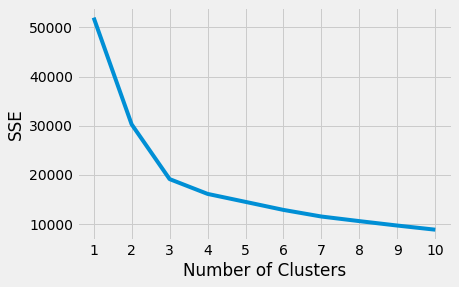

In [73]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [74]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

In [75]:
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=1141)

In [76]:
kmeans.fit(data[features])

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=1141,
       tol=0.0001, verbose=0)

In [77]:
kmeans.inertia_

19122.174048010485

In [78]:
kmeans.cluster_centers_

array([[0.54811697, 0.17050637, 0.0996712 , 0.47396423],
       [0.58787439, 0.27906464, 0.8926937 , 0.30062378],
       [0.56160492, 0.84114439, 0.52645789, 0.41268043]])

### From the result, we segmented all customers into 3 groups. And the real life application of the model could be to segment customers into groups and tailor offers or marketing message to better achieve marketing objectives

### For association rule learning, it is trying to give the product set that is frequently purchased together, however, in this dataset, every purchase is recorded in one order, it is not possible to do the we cannot do association rule learning, with real life application like People bought this also bought that.

### Moreover, due to the reason that the dataset does not have features like cutomers ID that we can group the purchase made by a customer, we cannot do recommendation system which suggest customers products that also bought by users with similar taste/ preference.